In [7]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [20]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import describe,fe,deep_learning

%reload_ext autoreload

# Load data

In [8]:
# load the CIFAR10 data
(x_train, _), (x_test, _) = cifar10.load_data()

# Image dimension

In [9]:
# input image dimensions
# we assume data format "channels_last"
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]
channels = x_train.shape[3]

# save image folder

In [12]:
# create saved_images folder
imgs_dir = 'saved_images'
save_dir = os.path.join(os.getcwd(), imgs_dir)
if not os.path.isdir(save_dir):
        os.makedirs(save_dir)

# display grayscale version of test images

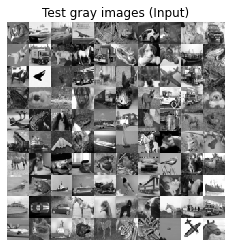

In [14]:
# display grayscale version of test images
imgs = x_test_gray[:100]
imgs = imgs.reshape((10, 10, img_rows, img_cols))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Test gray images (Input)')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.savefig('%s/test_gray.png' % imgs_dir)
plt.show()

# normalization

In [15]:
# normalize output train and test color images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [16]:
# normalize input train and test grayscale images
x_train_gray = x_train_gray.astype('float32') / 255
x_test_gray = x_test_gray.astype('float32') / 255

# reshape

In [17]:
# reshape images to row x col x channel for CNN output/validation
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)

# reshape images to row x col x channel for CNN input
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], img_rows, img_cols, 1)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], img_rows, img_cols, 1)

# parameter

In [18]:
# network parameters
input_shape = (img_rows, img_cols, 1)
batch_size = 32
kernel_size = 3
latent_dim = 256
# encoder/decoder number of CNN layers and filters per layer
layer_filters = [64, 128, 256]

# Model

In [25]:
autoencoder,callbacks = deep_learning.colorization_model(x_train,x_test,input_shape,layer_filters,kernel_size,latent_dim,channels,max_pixel=255)

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        640       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
latent_vector (Dense)        (None, 256)               1048832   
Total params: 1,418,496
Trainable params: 1,418,496
Non-trainable params: 0
_________________________________________________

# training

In [26]:
# train the autoencoder
history = autoencoder.fit(x_train_gray,
                x_train,
                validation_data=(x_test_gray, x_test),
                epochs=30,
                batch_size=batch_size,
                callbacks=callbacks)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
49952/50000 [============================>.] - ETA: 0s - loss: 0.0159
Epoch 00001: val_loss improved from inf to 0.01109, saving model to E:\gitlab\machine-learning\AutoEncoders\saved_models\colorized_ae_model.001.h5
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.0159 - val_loss: 0.0111
Epoch 2/30
49920/50000 [============================>.] - ETA: 0s - loss: 0.0104
Epoch 00002: val_loss improved from 0.01109 to 0.00967, saving model to E:\gitlab\machine-learning\AutoEncoders\saved_models\colorized_ae_model.002.h5
50000/50000 [==============================] - 39s 789us/sample - loss: 0.0104 - val_loss: 0.0097
Epoch 3/30
49952/50000 [============================>.] - ETA: 0s - loss: 0.0093
Epoch 00003: val_loss improved from 0.00967 to 0.00899, saving model to E:\gitlab\machine-learning\AutoEncoders\saved_models\colorized_ae_model.003.h5
50000/50000 [==============================] - 39s 771us/sample 

49952/50000 [============================>.] - ETA: 0s - loss: 0.0039- ETA:
Epoch 00030: ReduceLROnPlateau reducing learning rate to 1.0000000409520217e-05.

Epoch 00030: val_loss did not improve from 0.00754
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.0039 - val_loss: 0.0079


# evaluate

In [15]:
score = autoencoder.evaluate(x_test, x_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 2s 158us/sample - loss: 0.0110 - accuracy: 0.8119
Test loss: 0.010975064240396022
Test accuracy: 0.81189275


# Predict result

In [27]:
# predict the autoencoder output from test data
x_decoded = autoencoder.predict(x_test_gray)

# Plot result

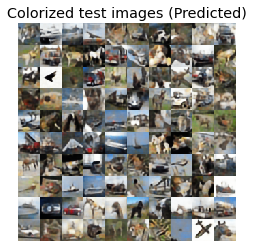

In [28]:
# predict the autoencoder output from test data
x_decoded = autoencoder.predict(x_test_gray)

# display the 1st 100 colorized images
imgs = x_decoded[:100]
imgs = imgs.reshape((10, 10, img_rows, img_cols, channels))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Colorized test images (Predicted)')
plt.imshow(imgs, interpolation='none')
plt.savefig('%s/colorized.png' % imgs_dir)
plt.show()

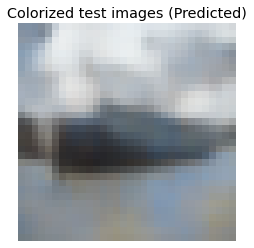

In [38]:
# imgs = x_decoded[18:19].reshape((10, 10, img_rows, img_cols, channels))
plt.figure()
plt.axis('off')
plt.title('Colorized test images (Predicted)')
plt.imshow(x_decoded[124] , interpolation='none')
plt.savefig('%s/colorized.png' % imgs_dir)
plt.show()